In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
data = pd.read_csv("dataset.csv", delimiter=';', keep_default_na=False, na_values=['NaN'])

NUM_AMOSTRAS = 30

filter_agreste = data[data['mesorregiao'] == 'Agreste Alagoano']
filter_sertao  = data[data['mesorregiao'] == 'Sertão Alagoano']
filter_leste   = data[data['mesorregiao'] == 'Leste Alagoano']

In [3]:
total_cidades_agreste = len(filter_agreste)
total_cidades_sertao  = len(filter_sertao)
total_cidades_leste   = len(filter_leste)
total_cidades = len(data)

print ('''
Total de cidades do Agreste Alagoano: %d
Total de cidades do Sertão Alagoano: %d
Total de cidades do Leste Alagoano: %d
''' %(total_cidades_agreste, total_cidades_sertao, total_cidades_leste))


Total de cidades do Agreste Alagoano: 24
Total de cidades do Sertão Alagoano: 26
Total de cidades do Leste Alagoano: 52



In [4]:
peso_agreste = float(total_cidades_agreste)/total_cidades
peso_sertao  = float(total_cidades_sertao)/total_cidades
peso_leste   = float(total_cidades_leste)/total_cidades

print ('''
Peso do Agreste Alagoano: %.2f
Peso do Sertão Alagoano: %.2f
Peso do Leste Alagoano: %.2f
''' %(peso_agreste, peso_sertao, peso_leste))


Peso do Agreste Alagoano: 0.24
Peso do Sertão Alagoano: 0.25
Peso do Leste Alagoano: 0.51



In [5]:
quantidade_sorteio_cidades_agreste = int(round(peso_agreste * NUM_AMOSTRAS))
quantidade_sorteio_cidades_sertao  = int(round(peso_sertao * NUM_AMOSTRAS))
quantidade_sorteio_cidades_leste   = int(round(peso_leste * NUM_AMOSTRAS))


print ('''
Quantidade de cidades para sorteio no Agreste Alagoano: %.d
Quantidade de cidades para sorteio no Sertão Alagoano: %.d
Quantidade de cidades para sorteio no Leste Alagoano: %.d
''' %(quantidade_sorteio_cidades_agreste, quantidade_sorteio_cidades_sertao, quantidade_sorteio_cidades_leste))


Quantidade de cidades para sorteio no Agreste Alagoano: 7
Quantidade de cidades para sorteio no Sertão Alagoano: 8
Quantidade de cidades para sorteio no Leste Alagoano: 15



In [6]:
sorteio_agreste = filter_agreste.sample(n=quantidade_sorteio_cidades_agreste, replace=False)
sorteio_sertao  = filter_sertao.sample(n=quantidade_sorteio_cidades_sertao, replace=False)
sorteio_leste   = filter_leste.sample(n=quantidade_sorteio_cidades_leste, replace=False)

agreste = pd.DataFrame(sorteio_agreste)
sertao = pd.DataFrame(sorteio_sertao)
leste  = pd.DataFrame(sorteio_leste)


new_data = pd.concat([agreste, sertao, leste])

new_data

,municipio,mesorregiao,com-clt,militares,sem-clt,conta-propria,empregadores
7,Belém,Agreste Alagoano,807.18,694.92,357.75,408.52,16510.73
97,Taquarana,Agreste Alagoano,586.67,1128.00,278.92,360.45,1500.00
28,Feira Grande,Agreste Alagoano,774.65,742.01,319.37,342.83,NaN
96,Tanque d'Arca,Agreste Alagoano,660.13,558.79,352.29,361.70,1352.40
71,Paulo Jacinto,Agreste Alagoano,874.07,571.38,341.22,453.29,1310.46
48,Mar Vermelho,Agreste Alagoano,645.63,583.04,348.30,352.19,NaN
52,Maribondo,Agreste Alagoano,691.83,831.23,362.27,688.01,1446.96
18,Carneiros,Sertão Alagoano,688.41,743.59,283.19,235.74,1840.74
57,Monteirópolis,Sertão Alagoano,545.76,607.13,296.12,393.70,NaN
26,Dois Riachos,Sertão Alagoano,730.59,594.67,340.34,388.54,1000.00


In [7]:
describe = new_data.describe()


resultado = {
    'com-clt': {
        'media': describe['com-clt']['mean'],
        'mediana': new_data['com-clt'].median(),
        'cv': (describe['com-clt']['std']/describe['com-clt']['mean'])*100,
        'dv': describe['com-clt']['std'],
        'min': describe['com-clt']['min'],
        'max': describe['com-clt']['max'],
        'q1': describe['com-clt']['25%'],
        'q3': describe['com-clt']['75%'],
        'p10': new_data['com-clt'].quantile(.10),
        'p90': new_data['com-clt'].quantile(.90)
        
    },
    'militares': {
        'media': describe['militares']['mean'],
        'mediana': new_data['militares'].median(),
        'cv': (describe['militares']['std']/describe['com-clt']['mean'])*100,
        'dv': describe['militares']['std'],
        'min': describe['militares']['min'],
        'max': describe['militares']['max'],
        'q1': describe['militares']['25%'],
        'q3': describe['militares']['75%'],
        'p10': new_data['militares'].quantile(.10),
        'p90': new_data['militares'].quantile(.90)
    },
    'sem-clt': {
        'media': describe['sem-clt']['mean'],
        'mediana': new_data['sem-clt'].median(),
        'cv': (describe['sem-clt']['std']/describe['com-clt']['mean'])*100,
        'dv': describe['sem-clt']['std'],
        'min': describe['sem-clt']['min'],
        'max': describe['sem-clt']['max'],
        'q1': describe['sem-clt']['25%'],
        'q3': describe['sem-clt']['75%'],
        'p10': new_data['sem-clt'].quantile(.10),
        'p90': new_data['sem-clt'].quantile(.90)
    },
    'conta-propria': {
        'media': describe['conta-propria']['mean'],
        'mediana': new_data['conta-propria'].median(),
        'cv': (describe['conta-propria']['std']/describe['com-clt']['mean'])*100,
        'dv': describe['conta-propria']['std'],
        'min': describe['conta-propria']['min'],
        'max': describe['conta-propria']['max'],
        'q1': describe['conta-propria']['25%'],
        'q3': describe['conta-propria']['75%'],
        'p10': new_data['conta-propria'].quantile(.10),
        'p90': new_data['conta-propria'].quantile(.90)
    },
    'empregadores': {
        'media': describe['empregadores']['mean'],
        'mediana': new_data['empregadores'].median(),
        'cv': (describe['empregadores']['std']/describe['com-clt']['mean'])*100,
        'dv': describe['empregadores']['std'],
        'min': describe['empregadores']['min'],
        'max': describe['empregadores']['max'],
        'q1': describe['empregadores']['25%'],
        'q3': describe['empregadores']['75%'],
        'p10': new_data['empregadores'].quantile(.10),
        'p90': new_data['empregadores'].quantile(.90)
    }
}

resultado

{'com-clt': {'media': 705.5163333333333,
  'mediana': 684.2950000000001,
  'cv': 12.742952483951417,
  'dv': 89.90361112318296,
  'min': 545.76,
  'max': 908.78,
  'q1': 654.7349999999999,
  'q3': 760.7049999999999,
  'p10': 594.251,
  'p90': 828.4400000000002},
 'militares': {'media': 869.0673333333333,
  'mediana': 842.175,
  'cv': 30.788235955837052,
  'dv': 217.2160334136365,
  'min': 558.79,
  'max': 1333.13,
  'q1': 742.405,
  'q3': 1015.635,
  'p10': 583.859,
  'p90': 1135.265},
 'sem-clt': {'media': 379.2796666666666,
  'mediana': 379.755,
  'cv': 8.975011585988902,
  'dv': 63.32017265771075,
  'min': 278.92,
  'max': 561.2,
  'q1': 341.81500000000005,
  'q3': 412.83750000000003,
  'p10': 295.241,
  'p90': 455.745},
 'conta-propria': {'media': 504.03833333333336,
  'mediana': 464.53499999999997,
  'cv': 23.404961257525265,
  'dv': 165.12582448217947,
  'min': 235.74,
  'max': 918.48,
  'q1': 375.40749999999997,
  'q3': 607.9425,
  'p10': 341.91499999999996,
  'p90': 721.595},
 

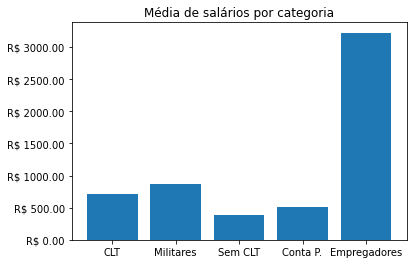

In [8]:
#mean

medias = [
    resultado['com-clt']['media'],
    resultado['militares']['media'],
    resultado['sem-clt']['media'],
    resultado['conta-propria']['media'],
    resultado['empregadores']['media']
]

categories = ['CLT', 'Militares', 'Sem CLT', 'Conta P.', 'Empregadores']

xs = [i + 0.5 for i, _ in enumerate(categories)]

def brazilian_real(x, pos):
    'The two args are the value and tick position'
    return 'R$ %1.2f' % (x)


formatter = FuncFormatter(brazilian_real)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

plt.bar(xs, medias)
plt.title('Média de salários por categoria')
plt.xticks([i + 0.5 for i, _ in enumerate(categories)], categories)
plt.show()